## Reading jsons

In [216]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams["figure.figsize"] = (7,7)
#plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json
from pathlib import Path

from pylatex import Document, Package, Section, NoEscape

## Read file names
#path_to_json = '.'

path_to_json = Path(os.getcwd()).glob("**/*.json")
list_files = [str(path) for path in path_to_json]


times_files = [pos_json for pos_json in list_files if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in list_files if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in list_files if pos_json.endswith('_mem.json')]
triangulation_files = [pos_json for pos_json in list_files if pos_json.endswith('_triangulation_info.json')]



# Read json of no compact files
data_to_append = []
for files in times_files:
    data_to_append.append(pd.read_json(files, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()


## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

## Read json of memory files
mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

## Read json of triangulation files
triangulation_data_to_append = []
for js in triangulation_files:
    triangulation_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_triangulation = pd.concat(triangulation_data_to_append, axis=1)
data_triangulation = data_triangulation.transpose()

#Sort dataframe by n_vertices
data_time = data_time.sort_values(by=['n_vertices'])
data_time_compact = data_time_compact.sort_values(by=['n_vertices'])
data_mem = data_mem.sort_values(by=['num_vertices'])
data_triangulation = data_triangulation.sort_values(by=['n_points'])

# Remove last rows of dataframe
#data_time = data_time.iloc[:15]
#data_time_compact = data_time_compact.iloc[:15]
#data_mem = data_mem.iloc[:15]
#data_triangulation = data_triangulation.iloc[:15]

## Average of tests
data_time = data_time.groupby(['n_vertices'], as_index=False).mean()
data_time_compact = data_time_compact.groupby(['n_vertices'], as_index=False).mean()
data_mem = data_mem.groupby(['num_vertices'], as_index=False).mean()
data_triangulation = data_triangulation.groupby(['n_points'], as_index=False).mean()



## Copy tables
data_time_table = data_time.copy(deep = True)
data_time_compact_table = data_time_compact.copy(deep = True)
data_mem_table = data_mem.copy(deep = True)
data_triangulation_table = data_triangulation.copy(deep = True)

#Geometric data as integer
data_time['n_vertices'] = data_time['n_vertices'].astype(int)
data_time['n_half_edges'] = data_time['n_half_edges'].astype(int)
data_time['n_faces'] = data_time['n_faces'].astype(int)
data_time['n_barrier_edge_tips'] = data_time['n_barrier_edge_tips'].astype(int)

data_time_compact['n_vertices'] = data_time_compact['n_vertices'].astype(int)
data_time_compact['n_half_edges'] = data_time_compact['n_half_edges'].astype(int)
data_time_compact['n_faces'] = data_time_compact['n_faces'].astype(int)
data_time_compact['n_barrier_edge_tips'] = data_time_compact['n_barrier_edge_tips'].astype(int)



##Substract mem of triangulation from mem of polylla
data_mem['mem_polylla'] = data_mem['mem_polylla'] - data_mem['mem_triangulation']
data_mem['mem_compact_polylla'] = data_mem['mem_compact_polylla'] - data_mem['mem_compact_triangulation']

## Add to polylla the mem of the nodes
data_mem['mem_polylla'] = data_mem['mem_polylla'] + data_mem['mem_nodes']
data_mem['mem_compact_polylla'] = data_mem['mem_compact_polylla'] + data_mem['mem_nodes']


memory_meausure = np.power(1024, 3) #gigabytes
#memory_meausure = np.power(1024, 2) #megabytes

## Convert byte to gb
data_mem['mem_triangulation'] = data_mem['mem_triangulation']/memory_meausure
data_mem['mem_polylla'] = data_mem['mem_polylla']/memory_meausure
data_mem['mem_compact_triangulation'] = data_mem['mem_compact_triangulation']/memory_meausure
data_mem['mem_compact_polylla'] = data_mem['mem_compact_polylla']/memory_meausure
data_mem['mem_gen_triangulation'] = data_mem['mem_gen_triangulation']/memory_meausure
data_mem['mem_gen_polylla'] = data_mem['mem_gen_polylla']/memory_meausure
data_mem['mem_gen_compact_triangulation'] = data_mem['mem_gen_compact_triangulation']/memory_meausure
data_mem['mem_gen_compact_polylla'] = data_mem['mem_gen_compact_polylla']/memory_meausure
data_mem['mem_pemb'] = data_mem['mem_pemb']/memory_meausure
data_mem['mem_nodes'] = data_mem['mem_nodes']/memory_meausure

## Convert ms to minutes
data_time['time_to_generate_polygonal_mesh'] = data_time['time_to_generate_polygonal_mesh']/60000
data_time['time_triangulation_generation'] = data_time['time_triangulation_generation']/60000
data_time['time_to_label_max_edges'] = data_time['time_to_label_max_edges']/60000
data_time['time_to_label_frontier_edges'] = data_time['time_to_label_frontier_edges']/60000
data_time['time_to_label_seed_edges'] = data_time['time_to_label_seed_edges']/60000
data_time['time_to_label_total'] = data_time['time_to_label_total']/60000
data_time['time_to_traversal_and_repair'] = data_time['time_to_traversal_and_repair']/60000
data_time['time_to_traversal'] = data_time['time_to_traversal']/60000
data_time['time_to_repair'] = data_time['time_to_repair']/60000

data_time_compact['time_to_generate_polygonal_mesh'] = data_time_compact['time_to_generate_polygonal_mesh']/60000
data_time_compact['time_triangulation_generation'] = data_time_compact['time_triangulation_generation']/60000
data_time_compact['time_to_label_max_edges'] = data_time_compact['time_to_label_max_edges']/60000
data_time_compact['time_to_label_frontier_edges'] = data_time_compact['time_to_label_frontier_edges']/60000
data_time_compact['time_to_label_seed_edges'] = data_time_compact['time_to_label_seed_edges']/60000
data_time_compact['time_to_label_total'] = data_time_compact['time_to_label_total']/60000
data_time_compact['time_to_traversal_and_repair'] = data_time_compact['time_to_traversal_and_repair']/60000
data_time_compact['time_to_traversal'] = data_time_compact['time_to_traversal']/60000
data_time_compact['time_to_repair'] = data_time_compact['time_to_repair']/60000

data_triangulation['triangulation_time'] = data_triangulation['triangulation_time']/60000
data_triangulation['memory_usage'] = data_triangulation['memory_usage']/memory_meausure
data_triangulation['memory_peak'] = data_triangulation['memory_peak']/memory_meausure



# Time generation data structure and mesh

Text(0, 0.5, 'Time in minutes')

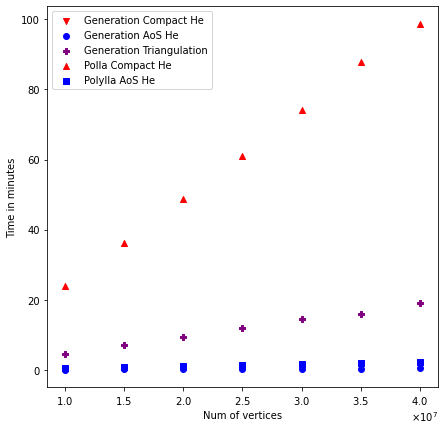

In [217]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="v", label='Generation Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="o",  label='Generation AoS He')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Generation Triangulation')

#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="red",marker="^", label='Polla Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue" ,marker="s",  label='Polylla AoS He')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")

In [218]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

q = """SELECT data_time.n_vertices as "#V", 
    data_triangulation.triangulation_time as "DT",
    data_time.time_triangulation_generation as "TAOS", 
    data_time_compact.time_triangulation_generation as "TCOM",
    data_time.time_to_generate_polygonal_mesh as "PAOS", 
    data_time_compact.time_to_generate_polygonal_mesh as "PCOM"
    FROM data_time, data_time_compact, data_triangulation
    WHERE data_time.n_vertices = data_time_compact.n_vertices and data_time.n_vertices = data_triangulation.n_points
    ORDER BY data_time.n_vertices """

time_table_latex = pysqldf(q).round(2)
time_table_latex

,#V,DT,TAOS,TCOM,PAOS,PCOM
0,10000000,4.67,0.14,0.26,0.58,23.86
1,15000000,7.19,0.20,0.39,0.87,36.31
2,20000000,9.58,0.27,0.52,1.15,48.82
3,25000000,11.92,0.33,0.65,1.43,60.90
4,30000000,14.70,0.40,0.78,1.73,74.06
5,35000000,16.08,0.47,0.92,2.01,87.77
6,40000000,19.17,0.52,1.05,2.25,98.67


In [219]:

from cProfile import label


time_table_latex["#V"] = ["10M", "15M", "20M", "25M", "30M", "35M", "40M"]
time_table_latex
_caption = "Comparison of time in minutes of the generation of Delaunay triangulatiuon (DT), the Half-edge Triangulation (GTAOS) data structure, the compact data structure (GTCOM), the polylla mesh using TAOS (GPAOS) and the Polylla mesh using the compact datastrucutre (GTCOM)."
_label = "tab:geneneration_datastruct_and_mesh"
string = NoEscape(time_table_latex.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="h"))
string


/tmp/ipykernel_8558/3200764548.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = NoEscape(time_table_latex.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="h"))


NoEscape(\begin{table}[h]
\centering
\caption{Comparison of time in minutes of the generation of Delaunay triangulatiuon (DT), the Half-edge Triangulation (GTAOS) data structure, the compact data structure (GTCOM), the polylla mesh using TAOS (GPAOS) and the Polylla mesh using the compact datastrucutre (GTCOM).}
\label{tab:geneneration_datastruct_and_mesh}
\begin{tabular}{lrrrrr}
\toprule
 \#V &    DT &  TAOS &  TCOM &  PAOS &  PCOM \\
\midrule
10M &  4.67 &  0.14 &  0.26 &  0.58 & 23.86 \\
15M &  7.19 &  0.20 &  0.39 &  0.87 & 36.31 \\
20M &  9.58 &  0.27 &  0.52 &  1.15 & 48.82 \\
25M & 11.92 &  0.33 &  0.65 &  1.43 & 60.90 \\
30M & 14.70 &  0.40 &  0.78 &  1.73 & 74.06 \\
35M & 16.08 &  0.47 &  0.92 &  2.01 & 87.77 \\
40M & 19.17 &  0.52 &  1.05 &  2.25 & 98.67 \\
\bottomrule
\end{tabular}
\end{table}
)

# Time by label phases

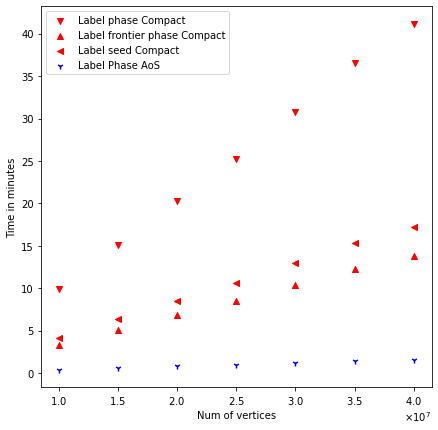

In [220]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Label frontier phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="<", label='Label seed Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="2",  label='Label frontier phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="3",  label='Label seed AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_label_phases.pdf', bbox_inches='tight', dpi=300)

# Time by polylla phases

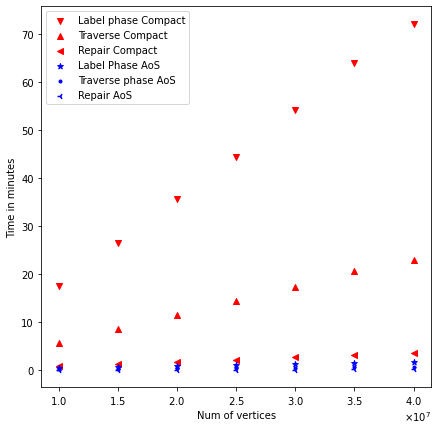

In [221]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'comp_time_polylla_phases.pdf', bbox_inches='tight', dpi=300)


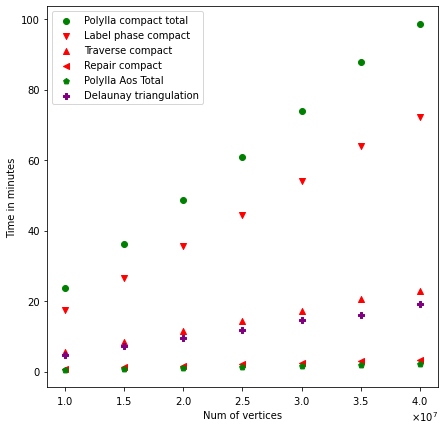

In [222]:
#data_time = data_time.iloc[:-1 , :]

plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="green",marker="o", label='Polylla compact total')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair compact')
plt.scatter(data_time_compact.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Delaunay triangulation')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_compact_polylla_phases.pdf', bbox_inches='tight', dpi=300)

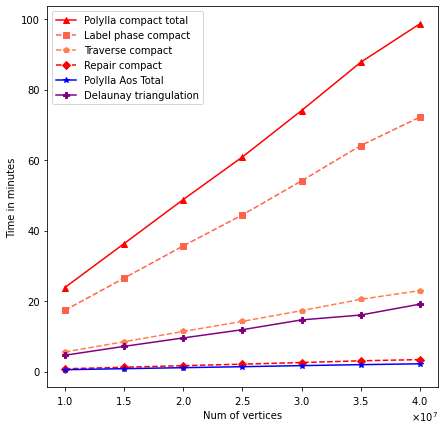

In [223]:
#data_time = data_time.iloc[:-1 , :]

plt.plot(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="red",marker="^", label='Polylla compact total')
plt.plot(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="tomato",marker="s", linestyle='dashed', label='Label phase compact')
plt.plot(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="coral",marker="p", linestyle='dashed', label='Traverse compact')
plt.plot(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="D", linestyle='dashed', label='Repair compact')

plt.plot(data_time_compact.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue",marker="*", label='Polylla Aos Total')
plt.plot(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Delaunay triangulation')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_compact_polylla_phases.pdf', bbox_inches='tight', dpi=300)

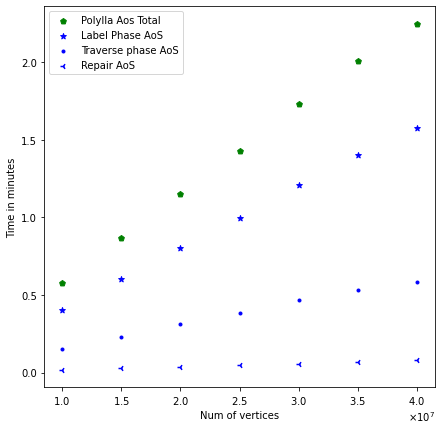

In [224]:

plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_polylla_AoS_phases.pdf', bbox_inches='tight', dpi=300)

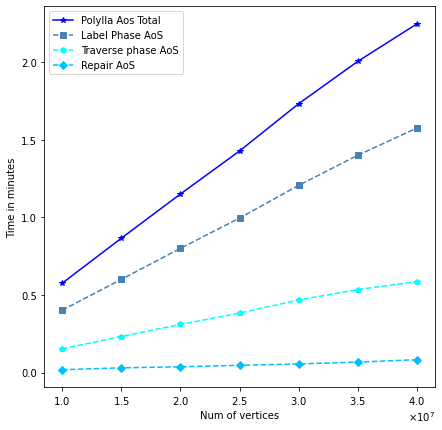

In [225]:
plt.plot(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue",marker="*", label='Polylla Aos Total')
plt.plot(data_time.n_vertices, data_time.time_to_label_total, c="steelblue" ,marker="s", linestyle='dashed',  label='Label Phase AoS')
plt.plot(data_time.n_vertices, data_time.time_to_traversal, c="cyan" ,marker="p", linestyle='dashed',  label='Traverse phase AoS')
plt.plot(data_time.n_vertices, data_time.time_to_repair, c="deepskyblue" ,marker="D", linestyle='dashed',  label='Repair AoS')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_polylla_AoS_phases.pdf', bbox_inches='tight', dpi=300)

# Memory comp general

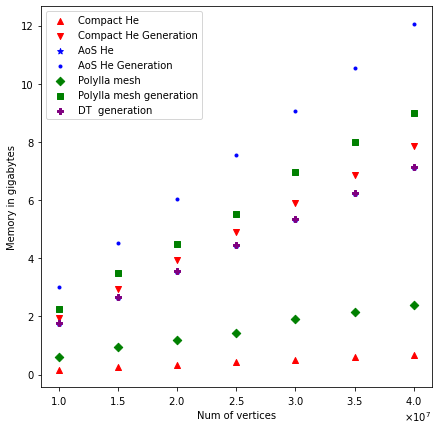

In [226]:

plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="v", label='Compact He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker=".",  label='AoS He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_polylla, c="green" ,marker="D",  label='Polylla mesh ')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="s",  label='Polylla mesh generation')
plt.scatter(data_triangulation.n_points, data_triangulation.memory_peak, c="purple",marker="P", label='DT  generation')

plt.legend()
# https://stackoverflow.com/questions/25750170/show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-plot
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")
plt.savefig(r'comp_memory_all.pdf', bbox_inches='tight', dpi=300)



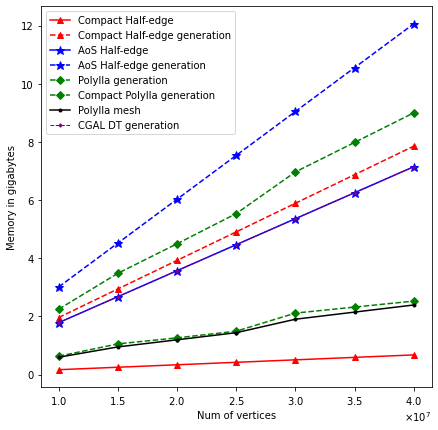

In [227]:
plt.plot(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact Half-edge')
plt.plot(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="^", label='Compact Half-edge generation', linestyle='dashed')

plt.plot(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS Half-edge', markersize=9)
plt.plot(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker="*",  label='AoS Half-edge generation', linestyle='dashed', markersize=9)

plt.plot(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="D",  label='Polylla generation', linestyle='dashed')
plt.plot(data_mem.num_vertices, data_mem.mem_gen_compact_polylla, c="green" ,marker="D",  label='Compact Polylla generation', linestyle='dashed')
plt.plot(data_mem.num_vertices, data_mem.mem_polylla, c="black" ,marker=".",  label='Polylla mesh')

plt.plot(data_triangulation.n_points, data_triangulation.memory_peak, c="purple", marker="P", label='CGAL DT generation', linestyle='dashed', linewidth=1, markersize=3)

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")

plt.savefig(r'comp_memory_all.pdf', bbox_inches='tight', dpi=300)

In [228]:
q = """SELECT data_mem.num_vertices as "#Vertices",  mem_compact_triangulation as "Triangulation compact", mem_gen_compact_triangulation as "Triangulation Compact Generation", mem_triangulation as "Triangulation AoS", mem_gen_triangulation as "Triangulation generation", mem_polylla as "Polylla mesh", mem_gen_polylla as "Polylla generation", memory_peak as "Delaunay Triangulation" 
FROM data_mem, data_triangulation
where data_mem.num_vertices = data_triangulation.n_points
ORDER BY num_vertices DESC
LIMIT 10"""

pysqldf(q)

,#Vertices,Triangulation compact,Triangulation Compact Generation,Triangulation AoS,Triangulation generation,Polylla mesh,Polylla generation,Delaunay Triangulation
0,40000000,0.678750,7.860004,7.151726,12.068335,2.396067,9.005080,7.153811
1,35000000,0.593953,6.877951,6.257712,10.559701,2.151224,7.988718,6.260757
2,30000000,0.508979,5.895567,5.363702,9.051074,1.906384,6.972340,5.367759
3,25000000,0.424184,4.910316,4.469693,7.542448,1.442803,5.539967,4.472251
4,20000000,0.339384,3.929835,3.575692,6.033837,1.197989,4.502365,3.577565
5,15000000,0.254504,2.947453,2.681697,4.525239,0.953155,3.485955,2.684260
6,10000000,0.169708,1.964805,1.787728,3.016690,0.598952,2.251032,1.788994


# Preguntas a responder

## Time questions
1. Percentage time diff polylla compact generation and polylla AoS generation
2. Percentage time diff triangulation generation vs compact triangulation vs Delaunay trianglation



## Memory questions
1. Percentage memory diff polylla compact generation and polylla AoS generation 
2. Percentage memory diff triangulation generation vs compact triangulation and Delunay triangulatiuon
3. Percetange memory diff compact triangulation vs AoS triangulation 
4. Memory uses by pemb and by nodes in the compact polylla output

In [229]:

q = """SELECT data_time.n_vertices as "#Vertices", data_triangulation.triangulation_time as "Delaunay Triangulation", data_time.time_triangulation_generation as "Triangulation AoS", data_time_compact.time_triangulation_generation as "Triangulation Compact", data_time.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_compact.time_to_generate_polygonal_mesh as "Polylla Compact", 

/* Percentage time diff polylla compact generation and polylla AoS generation */

(data_time.time_to_generate_polygonal_mesh/data_time_compact.time_to_generate_polygonal_mesh) as "PAOS/PolyCompact",
(data_time.time_triangulation_generation/data_time_compact.time_triangulation_generation) as "TAOS/TCOM",

/* Challa*/

(data_time.time_to_generate_polygonal_mesh/data_triangulation.triangulation_time) as "PAOS/Delaunay",
(data_time_compact.time_to_generate_polygonal_mesh/data_triangulation.triangulation_time) as "PolyCompact/Delaunay",
(data_triangulation.triangulation_time/data_time_compact.time_to_generate_polygonal_mesh) as "Delaunay/PolyCompact",
(data_triangulation.triangulation_time/data_time.time_to_generate_polygonal_mesh) as "Delaunay/PAOS",

/* Percentage time diff triangulation generation vs compact triangulation vs Delaunay trianglation*/

(data_time_compact.time_to_generate_polygonal_mesh/data_time.time_to_generate_polygonal_mesh) as "PolyCompact/PAOS",
(data_time_compact.time_triangulation_generation/data_time.time_triangulation_generation) as "TCompact/TAOS",
(data_time_compact.time_triangulation_generation/data_triangulation.triangulation_time) as "TCompact/DT"

    FROM data_time, data_time_compact, data_triangulation
    WHERE data_time.n_vertices = data_time_compact.n_vertices and data_time.n_vertices = data_triangulation.n_points
    ORDER BY data_time.n_vertices Desc
    LIMIT 10"""

time_results = pysqldf(q)

print("Compact polylla generation takes {} times more than AoS polylla generation".format(time_results["PolyCompact/PAOS"].mean().round(2)))
print("Compact triangulation generation takes {} times more than AoS triangulation generation".format(time_results["TCompact/TAOS"].mean().round(2)))
print("Polylla compact takes {} times more than Delaunay".format(time_results["PolyCompact/Delaunay"].mean().round(2)))
print("Delaunay generation takes {} times more more than Polylla AoS".format(time_results["Delaunay/PAOS"].mean().round(2)))

#time_results.mean().round(2)

Compact polylla generation takes 42.7 times more than AoS polylla generation
Compact triangulation generation takes 1.95 times more than AoS triangulation generation
Polylla compact takes 5.14 times more than Delaunay
Delaunay generation takes 8.3 times more more than Polylla AoS


In [230]:
mem_results = pd.merge(data_mem, data_triangulation, how = "outer", left_on='num_vertices', right_on='n_points')
mem_results

,num_vertices,num_triangles,num_halfedges,mem_initial,mem_triangulation,mem_polylla,mem_compact_triangulation,mem_compact_polylla,mem_gen_triangulation,mem_gen_polylla,mem_gen_compact_triangulation,mem_gen_compact_polylla,mem_pemb,mem_nodes,n_points,triangulation_time,memory_usage,memory_peak
0,10000000,19992081.0,59984160.0,1305.0,1.787728,0.598952,0.169708,0.598987,3.016690,2.251032,1.964805,0.632488,0.019244,0.149012,10000000,4.672006,1.938006,1.788994
1,15000000,29990159.0,89980316.0,1305.0,2.681697,0.953155,0.254504,0.953194,4.525239,3.485955,2.947453,1.058499,0.028809,0.223517,15000000,7.191533,2.907777,2.684260
2,20000000,39988722.0,119977442.0,1305.0,3.575692,1.197989,0.339384,1.198033,6.033837,4.502365,3.929835,1.264892,0.038459,0.298023,20000000,9.581294,3.875588,3.577565
3,25000000,49987407.0,149974812.0,1305.0,4.469693,1.442803,0.424184,1.442870,7.542448,5.539967,4.910316,1.494525,0.048027,0.372529,25000000,11.920306,4.844780,4.472251
4,30000000,59986247.0,179972492.0,1305.0,5.363702,1.906384,0.508979,1.906452,9.051074,6.972340,5.895567,2.117196,0.057591,0.447035,30000000,14.698822,5.814794,5.367759
5,35000000,69985104.0,209970206.0,1305.0,6.257712,2.151224,0.593953,2.151413,10.559701,7.988718,6.877951,2.323909,0.067335,0.521541,35000000,16.077311,6.782297,6.260757
6,40000000,79984026.0,239968050.0,1305.0,7.151726,2.396067,0.678750,2.396144,12.068335,9.005080,7.860004,2.529814,0.076901,0.596046,40000000,19.172033,7.749858,7.153811


In [231]:
## tabla en latex para paper

q = """SELECT
            num_vertices as "#V",  
            mem_triangulation as "TAOS",
            mem_compact_triangulation as "TCOM",
            mem_pemb as "Pemb",
            mem_compact_triangulation - mem_pemb as "Nodes",
            mem_gen_triangulation as "GTAOS",
            mem_gen_compact_triangulation as "GTCOM",
            memory_peak as "GDT",
            mem_gen_polylla as "GPAOS",
            mem_gen_compact_polylla as "GPCOM",
            mem_polylla as "Polylla"
FROM mem_results """

latex_table = pysqldf(q).round(2)
latex_table["#V"] = ["10M", "15M", "20M", "25M", "30M", "35M", "40M"]
latex_table

,#V,TAOS,TCOM,Pemb,Nodes,GTAOS,GTCOM,GDT,GPAOS,GPCOM,Polylla
0,10M,1.79,0.17,0.02,0.15,3.02,1.96,1.79,2.25,0.63,0.60
1,15M,2.68,0.25,0.03,0.23,4.53,2.95,2.68,3.49,1.06,0.95
2,20M,3.58,0.34,0.04,0.30,6.03,3.93,3.58,4.50,1.26,1.20
3,25M,4.47,0.42,0.05,0.38,7.54,4.91,4.47,5.54,1.49,1.44
4,30M,5.36,0.51,0.06,0.45,9.05,5.90,5.37,6.97,2.12,1.91
5,35M,6.26,0.59,0.07,0.53,10.56,6.88,6.26,7.99,2.32,2.15
6,40M,7.15,0.68,0.08,0.60,12.07,7.86,7.15,9.01,2.53,2.40


In [232]:
_caption = "Memory usage in gigabytes (GB) by the algorithm, TAOS is the memory used to store the AoS triagulation, TCOM is the memory used to store the compact triangulation, TCOM is also the sum of the memory usage of PEMB and the nodes, GDT is the memory cost to generate the Delaunay triangulation by CGAL, GENDT is the memory cost to generate the polylla mesh using TAOS, GENPC is the memory cost to generate the polylla mesh using TCOM, and Polylla is the memory used to store the polylla mesh and the nodes of output mesh."
_label = "tab:memory_usage"
#string = NoEscape(latex_table.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="ht").replace('table', 'table*'))
#string
#


In [233]:
another_table_for_latex = latex_table.copy(deep = True)

another_table_for_latex = another_table_for_latex.reindex(columns=["#V", "GDT", "TAOS", "GTAOS", "GPAOS", "TCOM", "Pemb", "Nodes",  "GTCOM", "GPCOM", "Polylla"])

cols = pd.MultiIndex.from_tuples([
  ("", "#V"),
  ("", "GDT"),
  ("AoS", "HF"), 
  ("AoS", "GHF"), 
  ("AoS", "GP"),

  ("Compact", "HF"),
  ("Compact", "Pemb"),
  ("Compact", "Coord"),
  ("Compact", "GHF"),
  ("Compact", "GP"),

  ("", "Polylla"),
])

_caption = "Memory usage in gigabytes by the algorithm, GDT is the Delaunay triangulation Generation, HF is the memory used to store the hafl-edge data structure, GHF is the memory cost to generate the triangulation, GP is the memory cost to generate the polylla mesh. In the case of the compact HF, HF is also the memory used to store the vertices coordinates (Coord) and the Pemb data structure. The Polylla column is the memory used to store the Polylla mesh."

_label = "tab:memory_usage"

another_table_for_latex.columns=pd.MultiIndex.from_tuples(cols)

string = another_table_for_latex.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="ht", multicolumn=True, multicolumn_format = "c").replace('table', 'table*')

another_table_for_latex
print(string)
#    \multicolumn{2}{r}{} & \multicolumn{3}{c}{AoS} & \multicolumn{6}{c}{Compact} \\
#    \cmidrule(lr){3-5}   \cmidrule(lr){6-10}

\begin{table*}[ht]
\centering
\caption{Memory usage in gigabytes by the algorithm, GDT is the Delaunay triangulation Generation, HF is the memory used to store the hafl-edge data structure, GHF is the memory cost to generate the triangulation, GP is the memory cost to generate the polylla mesh. In the case of the compact HF, HF is also the memory used to store the vertices coordinates (Coord) and the Pemb data structure. The Polylla column is the memory used to store the Polylla mesh.}
\label{tab:memory_usage}
\begin{tabular}{lrrrrrrrrrr}
\toprule
    & \multicolumn{3}{c}{AoS} & \multicolumn{6}{c}{Compact} \\
 \#V &  GDT &   HF &   GHF &   GP &      HF & Pemb & Coord &  GHF &   GP & Polylla \\
\midrule
10M & 1.79 & 1.79 &  3.02 & 2.25 &    0.17 & 0.02 &  0.15 & 1.96 & 0.63 &    0.60 \\
15M & 2.68 & 2.68 &  4.53 & 3.49 &    0.25 & 0.03 &  0.23 & 2.95 & 1.06 &    0.95 \\
20M & 3.58 & 3.58 &  6.03 & 4.50 &    0.34 & 0.04 &  0.30 & 3.93 & 1.26 &    1.20 \\
25M & 4.47 & 4.47 &  7.54 & 5.54 

/tmp/ipykernel_8558/4156443786.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = another_table_for_latex.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="ht", multicolumn=True, multicolumn_format = "c").replace('table', 'table*')


In [234]:

time_table_latex2 = time_table_latex.copy(deep = True)

time_table_latex2 = time_table_latex2.reindex(columns=["#V", "DT", "TAOS", "TCOM", "PAOS", "PCOM"])


cols = pd.MultiIndex.from_tuples([
  ("", "#V"),
  ("", "GDT"),
  ("AoS", "GHF"), 
  ("AoS", "GP"),
  ("Compact", "GHF"),
  ("Compact", "GP"),
])

time_table_latex2.columns=pd.MultiIndex.from_tuples(cols)

_caption = "Comparison of time in minutes of the generation of Delaunay triangulation (GDT), the Half-edge data structure (GHF), and the Polylla mesh generation."
_label = "tab:geneneration_datastruct_and_mesh"
string = time_table_latex2.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="h", multicolumn=True, multicolumn_format = "c")
print(string)
# \cmidrule(lr){3-4}   \cmidrule(lr){5-6}

\begin{table}[h]
\centering
\caption{Comparison of time in minutes of the generation of Delaunay triangulation (GDT), the Half-edge data structure (GHF), and the Polylla mesh generation.}
\label{tab:geneneration_datastruct_and_mesh}
\begin{tabular}{lrrrrr}
\toprule
    & \multicolumn{2}{c}{AoS} & \multicolumn{2}{c}{Compact} \\
 \#V &   GDT &  GHF &   GP &     GHF &    GP \\
\midrule
10M &  4.67 & 0.14 & 0.26 &    0.58 & 23.86 \\
15M &  7.19 & 0.20 & 0.39 &    0.87 & 36.31 \\
20M &  9.58 & 0.27 & 0.52 &    1.15 & 48.82 \\
25M & 11.92 & 0.33 & 0.65 &    1.43 & 60.90 \\
30M & 14.70 & 0.40 & 0.78 &    1.73 & 74.06 \\
35M & 16.08 & 0.47 & 0.92 &    2.01 & 87.77 \\
40M & 19.17 & 0.52 & 1.05 &    2.25 & 98.67 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_8558/2805625863.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = time_table_latex2.to_latex(index=False, float_format='{:.2f}'.format, caption=_caption, label = _label, position="h", multicolumn=True, multicolumn_format = "c")


In [235]:
# 4. Memory uses by pemb and by nodes in the compact polylla output

## Memory uses by pemb and by nodes in the compact polylla output

percentage_pemb = (mem_results['mem_pemb']*100/mem_results['mem_compact_polylla']).mean().round(2)
percentage_nodes = (mem_results['mem_nodes']*100/mem_results['mem_compact_polylla']).mean().round(2)

print("The memory used by pemb is {}% of the memory used by the compact polylla mesh".format(percentage_pemb))
print("The memory used by nodes is {}% of the memory used by the compact polylla mesh".format(percentage_nodes))

## Memory uses by pemb and by nodes in the compact triangulation input

percentage_pemb = (mem_results['mem_pemb']*100/mem_results['mem_compact_triangulation']).mean().round(2)
percentage_nodes = (mem_results['mem_nodes']*100/mem_results['mem_compact_triangulation']).mean().round(2)

print("The memory used by pemb is {}% of the memory used by the compact triangulation".format(percentage_pemb))
print("The memory used by nodes is {}% of the memory used by the compact triangulation".format(100 - percentage_pemb))

##1. Percentage memory diff polylla compact generation and polylla AoS generation 
##2. Percentage memory diff triangulation generation vs compact triangulation and Delunay triangulatiuon
##3. Percetange memory diff compact triangulation vs AoS triangulation 

#Percentage memory diff polylla compact generation and polylla AoS generation 
div_men_gen_polylla_compact_polylla = (mem_results['mem_gen_polylla']/mem_results['mem_gen_compact_polylla']).mean().round(2)

print("AoS polylla generation takes {} times more memory than Compact polylla generation".format(div_men_gen_polylla_compact_polylla))

##2. Percentage memory diff triangulation generation vs compact triangulation and Delunay triangulatiuon

print("AoS triangulation generation takes {} times more memory than Compact triangulation generation".format((mem_results['mem_gen_triangulation']/mem_results['mem_gen_compact_triangulation']).mean().round(2) ))

print("Compact polylla generation takes {} times more memory thanDelaunay triangulation generation".format((mem_results['mem_gen_compact_triangulation']/mem_results['memory_peak']).mean().round(2) ))

##3. Percetange memory diff compact triangulation vs AoS triangulation 

print("AoS triangulation  takes {} times more memory than Compact polylla ".format((mem_results['mem_triangulation']/mem_results['mem_compact_triangulation']).mean().round(2) ))

print("The compact triangulation uses a {}% of memory  of the AoS triangulation".format((mem_results['mem_compact_triangulation']/mem_results['mem_triangulation']).mean().round(2)*100 ))


The memory used by pemb is 3.16% of the memory used by the compact polylla mesh
The memory used by nodes is 24.51% of the memory used by the compact polylla mesh
The memory used by pemb is 11.33% of the memory used by the compact triangulation
The memory used by nodes is 88.67% of the memory used by the compact triangulation
AoS polylla generation takes 3.49 times more memory than Compact polylla generation
AoS triangulation generation takes 1.54 times more memory than Compact triangulation generation
Compact polylla generation takes 1.1 times more memory thanDelaunay triangulation generation
AoS triangulation  takes 10.54 times more memory than Compact polylla 
The compact triangulation uses a 9.0% of memory  of the AoS triangulation
